In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time
import scipy.stats as stats

In [4]:
data = pd.read_csv("../Desktop/Code/DS_DPS/data/crimes_v1.csv", sep = ',')

In [5]:
data.head()

,id,crime_type,date,time,location,incident_description,vehicle_description,age,eye_color,hair_color,height,race,sex,weight,additional_description,weapon,email_from,email_subject,message_id
0,1,Aggravated Assault,2025-03-02,11:05 a.m.,Northeast corner of Jefferson Boulevard & McCl...,The suspect brandished a knife at the victim. ...,Teal bicycle,39.0,NaN,Gray,5 feet 6 inches,NaN,Male,Slim build,"Wearing a plaid shirt, black pants, black shoe...",Knife,USC Department of Public Safety <uscpublicsafe...,Timely Warning Crime Alert - Aggravated Assault,19558e0be8cd7c02
1,2,NaN,2025-02-27,4:56 p.m.,At the intersection of 28th Street & Hoover St...,The suspect ran up behind the victim and grope...,NaN,39.0,Brown,Short brown hair,5 feet 5 inches,Hispanic,Male,Medium build,Wearing black t-shirt and dark sweatpants or j...,NaN,USC Department of Public Safety <uscpublicsafe...,Crime Alert - Sexual Battery/Fondling,1954a92157ad3085
2,3,Robbery,2025-02-25,8:49 a.m.,At the intersection of 30th Street & Hoover St...,The suspect snatched the victim's phone from t...,NaN,25.0,NaN,Dark short hair,5 feet 7 inches,Hispanic,Male,Slim build,Wearing a blue shirt and blue jeans.,NaN,USC Department of Public Safety <uscpublicsafe...,Timely Warning Crime Alert - Robbery,1953e62c1b20aab1
3,4,Burglary,2025-02-20,3:55 a.m.,UPC Troy Hall at 3025 Royal Street,The Department of Public Safety received a del...,NaN,25.0,Brown,Dark brown,NaN,Hispanic,Male,Slim build,"Wearing beige cargo pants, white shoes, and a ...",NaN,USC Department of Public Safety <uscpublicsafe...,Timely Warning Crime Alert - Burglary,19524e109810f11f
4,5,NaN,2025-02-19,5:30 a.m.,Off UPC campus in the 1200 block of 30th Street,"While the victim was asleep, the suspect enter...",NaN,NaN,NaN,NaN,NaN,Hispanic,Male,Medium build,"Wearing a black beanie, black sweatshirt, gray...",NaN,USC Department of Public Safety <uscpublicsafe...,Crime Alert - Burglary & Motor Vehicle Theft,1951fc48caee7216


In [6]:
data["time"].head()

0    11:05 a.m.
1     4:56 p.m.
2     8:49 a.m.
3     3:55 a.m.
4     5:30 a.m.
Name: time, dtype: object

In [7]:
data["time"].value_counts()

time
4:00 p.m.     2
3:55 a.m.     2
4:50 a.m.     2
7:55 a.m.     2
11:05 a.m.    1
             ..
6:51 p.m.     1
12:27 p.m.    1
9:10 p.m.     1
5:58 p.m.     1
10:30 pm      1
Name: count, Length: 108, dtype: int64

## Filter data

In [18]:
filtered = data[~data["time"].isna()].copy()

In [19]:
filtered["time"].value_counts()

time
4:00 p.m.     2
3:55 a.m.     2
4:50 a.m.     2
7:55 a.m.     2
11:05 a.m.    1
             ..
6:51 p.m.     1
12:27 p.m.    1
9:10 p.m.     1
5:58 p.m.     1
10:30 pm      1
Name: count, Length: 108, dtype: int64

In [23]:
print(f'Preserved: {len(filtered)} of original: {len(data)}')

Preserved: 112 of original: 155


In [26]:
filtered["cleaned_time"] = filtered["time"].str.replace(".", "", regex = False)

In [27]:
filtered["parsed_time"] = pd.to_datetime(filtered["cleaned_time"], format = "%I:%M %p").dt.time

In [28]:
filtered["minutes"] = filtered["parsed_time"].apply(lambda t: t.hour * 60 + t.minute)

## 7 number summary

In [31]:
def min2time(m):
    h, m = divmod(int(m), 60)
    return time(h % 24, m)

In [32]:
percentiles = [0.02, 0.09, 0.25, 0.50, 0.75, 0.91, 0.98]
summary = filtered["minutes"].quantile(percentiles)
summary.index = ["P2", "P9", "Q1", "Median", "Q3", "P91", "P98"]
summary_time = summary.apply(min2time)
print(summary_time)

P2        00:35:00
P9        02:59:00
Q1        08:01:00
Median    15:25:00
Q3        19:40:00
P91       22:25:00
P98       23:00:00
Name: minutes, dtype: object


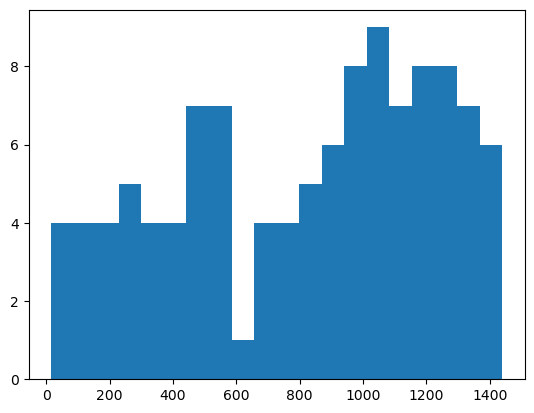

In [46]:
plt.hist(filtered["minutes"], bins = 20);

In [35]:
np.max(filtered["minutes"]) # 24 * 60 = 1440

1439

## Question 3

In [48]:
# stdev
n = filtered["minutes"].count()
stdev = filtered["minutes"].std()
stderr = stdev / np.sqrt(n)

print("SAMP DIST:")
print("Mean: ", min2time(np.mean(filtered["minutes"])))
print("SE: ", min2time(stderr))
print("STDEV: ", min2time(stdev))

SAMP DIST:
Mean:  13:37:00
SE:  00:38:00
STDEV:  06:50:00


In [49]:
stdev

410.41626299230813

## 95% CI

In [52]:
x = filtered["minutes"]
n = x.count()
mean = x.mean()
stdev = x.std()
se = stdev / np.sqrt(n)
z = 1.96

cil = mean - (z * se)
ciu = mean + (z * se)
print(f'[{min2time(cil)}, {min2time(ciu)}]')

[12:21:00, 14:53:00]


## P-value for Ha = 2-sided

In [56]:
H0 = 1140     # H0 = 7:00 PM
x = filtered["minutes"]
n = x.count()
mean = x.mean()
stdev = x.std()
se = stdev / np.sqrt(n)
z = (mean - H0) / se
p = 2 * stats.norm.sf(abs(z))
print(f'H0: {min2time(H0)}')
print(f'Mean: {min2time(mean)}')
print(f'z: {z}')
print(f'p: {p}')

H0: 19:00:00
Mean: 13:37:00
z: -8.322210300740805
p: 8.633794808756251e-17
